# Интегрирование функций

Постановка задачи: вычислить определенный интеграл 

$$
\int_a^{b} f(x)\, dx
$$

для данной функции $f(x)$ в заданных пределах от $a$ до $b$.

In [3]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.xkcd()

In [2]:
def f(x):
    return (x - 1)**3 + 0.5

<IPython.core.display.Javascript object>


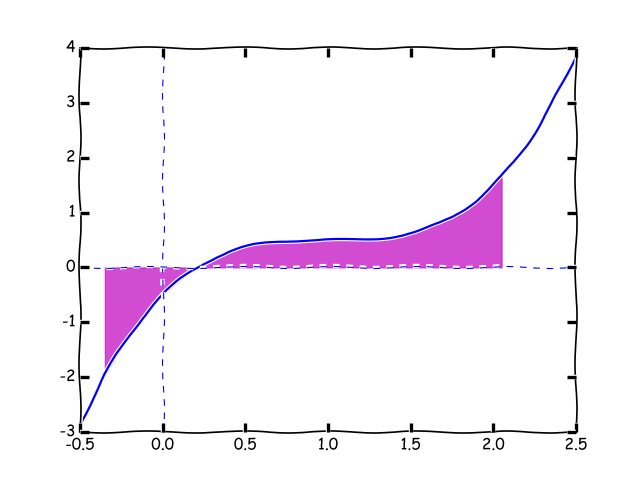

In [3]:
xx = np.linspace(-0.5, 2.5, 41)
plt.plot(xx, f(xx))

a, b = -0.4, 2.1

xxx = xx[(a < xx) & (xx < b)]
plt.fill_between(xxx, f(xxx), alpha=0.7, color='m')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

## Использование библиотеки SciPy

In [4]:
from scipy.integrate import quad

a, b = -0.4, 2.1
quad(f, a, b)

(0.6556250000000003, 1.9706427010952404e-14)


## Формулы Ньютона-Котеса

Рассмотрим разбиение интервала интегрирования

$$
a = x_0 < x_1 < \dots < x_{N_1} < x_N = b \;.
$$

На каждом *элементарном интервале*, $[x_j, x_{j+1}]$, аппроксимируем значение интеграла. Просуммировав результаты, получаем *составную формулу*, которая в пределе $N\to\infty$ дает точное значение интеграла.

Правило *левых прямоугольников*,


$$
\int_{x_0}^{x_0 + h} f(x)\, dx \approx f(x_0) \, h\;,
$$

является точным для кусочно-постоянных функций. Нетрудно показать, что погрешность составной формулы левых прямоугольников шкалируется линейно с размером шага разбиения, $\sim 1/N$.

In [5]:
def lrect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*j
        summ += f(x) * h
    return summ

In [6]:
for n in (10, 100, 1000, 10000):
    res = lrect(lambda x: x**3, 0, 1, n)
    print("%5.5g : %g" % (n,  res - 0.25))

   10 : -0.0475
  100 : -0.004975
 1000 : -0.00049975
10000 : -4.99975e-05


Правило *средних прямоугольников*,

$$
\int_{x_0}^{x_0 + h} f(x)\,dx \approx f(x_0 + \frac{h}{2}) \, h\;,
$$

является точным для линейной функции $f(x)$, поэтому погрешность составной формулы $\sim 1/N^2$.

Заметим, что правило средних прямоугольников является примером *открытой* квадратурной формулы, не требующей вычисления значения подинтегральной функции на границах интервала интегрирования.

In [12]:
def crect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [13]:
for n in (10, 100, 1000, 10000):
    print("%5.5g : %g" % (n, crect(lambda x: x**3, 0, 1, n) - 0.25))

   10 : -0.00125
  100 : -1.25e-05
 1000 : -1.25e-07
10000 : -1.25e-09


Для построения квадратурных формул высших порядков рассмотрим элементарный интервал $[0, 1]$. (Заметим, что ограничения общности тут нет, т.к. любой интервал $[x_0, x_0 + h]$ линейным преобразованием приводится к интервалу $[0, 1]$).


Используем метод неопределенных коэффициентов: Представим значение интеграла как линейную комбинацию значений подынтегральной функции в $k+1$ точках, и подберем коэффициенты так, чтобы результат был бы точным для функций $x^0$, $x^1$, $\dots$, $x^k$. 

Например, построим трехточечную схему (т.е. *метод Симпсона*).

Положим 

$$
\int_0^1 f(x)\, dx = a f(x_0) + b f(x_1) + c f(x_2)\;,
$$
где $x_0 = 0$, $x_1 = \dfrac{1}{2}$, $x_2 = 1$ (т.е. $h=\dfrac{1}{2}$). 

Подберем коэффициенты $a$, $b$ и $c$ исходя из условий:

$$
\begin{matrix}
f(x) = 1 :& \qquad  &1            &= &a + &b + &c \;, \\
f(x) = x :& \qquad  &\dfrac{1}{2} &= &&\dfrac{1}{2}b + &c\;, \\
f(x) = x^2: &\qquad &\dfrac{1}{3} &= &&\dfrac{1}{4}b + &c \;.  
\end{matrix}
$$

В качестве решения имеем $a = c = \dfrac{1}{6}$ и $b = \dfrac{2}{3}$. Таким образом

$$
\begin{aligned}
\int_0^1 f(x) \,dx &\approx \frac{1}{6} \left( f_0 + 4 f_1 + f_2 \right) \\
                   &= \frac{1}{3} h \left(f_0 + 4f_1 + f_2 \right) \;.
\end{aligned}
$$

### Метод Ромберга


Предположим, что мы вычислили приближение $I_N$ интеграла $I$, такое что

$$
I_N = I + \gamma N^{-2} + \dots
$$


Тогда

$$
I^{(1)} = \frac{4 I_{2N} - I_N}{4 - 1}
$$

представляет собой улучшенное приближение точного значения интеграла $I$.

При вычислении производных мы эту технологию встречали под именем *экстраполяции Ричардсона*.

На этом месте большинство учебников останавливаются. А мы, наоборот, продолжим.

### Прежде чем приниматься вычислять интеграл, необходимо убедиться, что он существует

Например,

$$
\int_0^{\pi^2/4}\! \frac{dx}{\sin{x}}
$$

### Интегрируемые сингулярности


Например,

$$
I = \int_0^{\pi^2/4}\! \frac{dx}{\sin{\sqrt{x}}}
$$

Прибавим и вычтем член, имеющий такую же особенность на нижнем пределе интегрирования:

$$
\begin{aligned}
I &= \int_0^{\pi^2/4} \frac{dx}{\sin{\sqrt{x}}} \\
  &= \int_0^{\pi^2/4} \!dx \left( \frac{1}{\sin{\sqrt{x}}} - \frac{1}{\sqrt{x}} + \frac{1}{\sqrt{x}} \right) \\
  &= \int_0^{\pi^2/4} \!dx \left( \frac{1}{\sin{\sqrt{x}}} - \frac{1}{\sqrt{x}}  \right)  + \pi\;.
\end{aligned}
$$

Теперь оставшийся интеграл на нижнем пределе регулярен. Следует, однако, обратить внимание на возможную потерю точности при вычислении подынтегральной функции при малых значениях $x$.

## Адаптивные методы


Традиционно, методы Ньютона-Котеса формулируются на сетках с постоянным шагом. Если подынтегральная функция имеет резкие пики, равномерная сетка, очевидно, неоптимальна.

In [9]:
def f(x):
    return 1.0 / (1.0 + x)**3

<IPython.core.display.Javascript object>


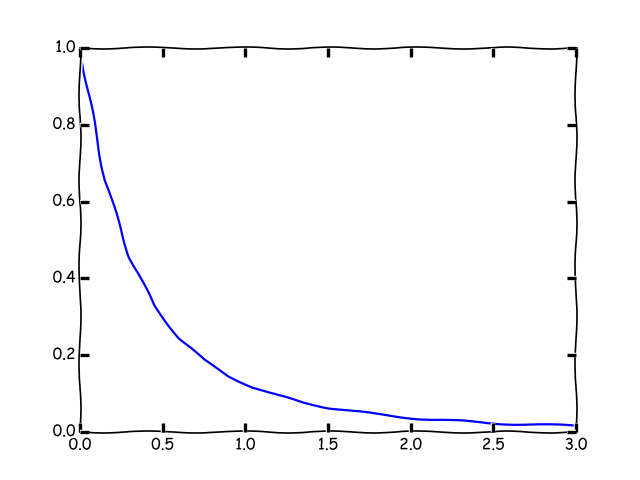

In [10]:
a, b = 0, 3
xx = np.linspace(a, b, 21)
plt.plot(xx, f(xx))

### Простейшая идея: 

Используем метод средних прямоугольников, на каждом шаге разбиваем на две части прямоугольник максимальной площади.

<IPython.core.display.Javascript object>


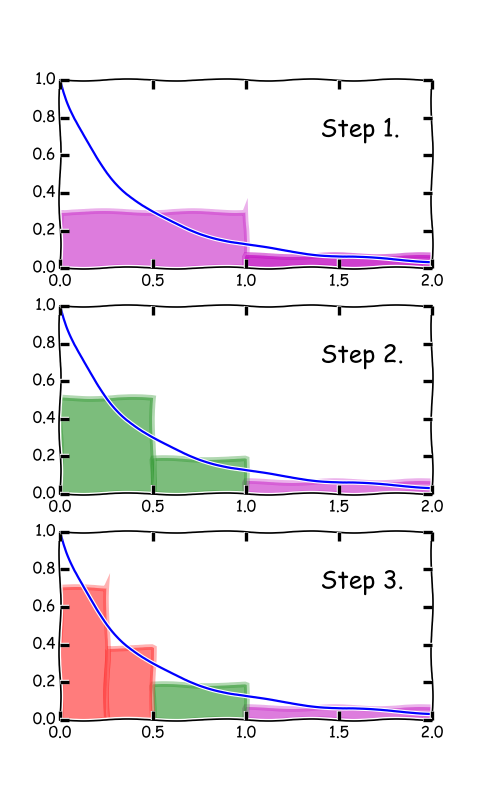

In [12]:
import matplotlib.patches as patches

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 10))

a, b = 0, 2
xx = np.linspace(a, b, 101)
ax1.plot(xx, f(xx))


# two rectangles
w, h = (a+b)/2., f((a+b)/4.)
ax1.add_patch(patches.Rectangle((0, 0), w, h, color='m', alpha=0.3, lw=5) )
ax1.add_patch(patches.Rectangle((w, 0), w, f(3/4*b), color='m', alpha=0.5, lw=5))
ax1.text(0.7, 0.7, 'Step 1.', transform=ax1.transAxes, fontsize=22)

# three rectangles
ax2.plot(xx, f(xx))
xs = [0, b/4, b/2]
ws = [b/4, b/4, b/2]
hs = [f(b/8), f(3*b/8), f(3*b/4)]
cs = ['g', 'g', 'm']
for j in [2, 1, 0]:
    ax2.add_patch(patches.Rectangle((xs[j], 0), ws[j], hs[j], color=cs[j], alpha=0.3, lw=5))
ax2.text(0.7, 0.7, 'Step 2.', transform=ax2.transAxes, fontsize=22)
    
# four rectangles:
ax3.plot(xx, f(xx))

xs = [0, b/8, b/4, b/2]
ws = [b/8, b/8, b/4, b/2]
hs = [f(b/16), f(b/8 + b/16), f(3*b/8), f(3*b/4)]
cs = ['r', 'r', 'g', 'm']
for j in [3, 2, 1, 0]:
    ax3.add_patch(patches.Rectangle((xs[j], 0), ws[j], hs[j], color=cs[j], alpha=0.3, lw=5))
ax3.text(0.7, 0.7, 'Step 3.', transform=ax3.transAxes, fontsize=22)

In [1]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [4]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n, res = ', n, res)


n, res =  5 0.955269838835
n, res =  25 0.978671896243
n, res =  125 0.995650200161
n, res =  250 0.995949160479
n, res =  500 0.996002789179
n, res =  1000 0.999739161075
n, res =  5000 0.999940521245


In [5]:
% timeit adapt_rect_list(f, a, b, npts=1000)

161 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Вопросы для практических занятий и самостоятельной работы:

1. Написать программу интегрирования заданной функции методом *правых* прямоугольников. Сравнить скорость сходимости метода с методами левых и средних прямоугольников.

2. Написать программу интегрирования заданной функции методом Симпсона. Сравнить скорость сходимости метода с методом средних прямоугольников.

1. Вычислить интеграл $\int_0^{\pi^2/4} dx \,/ \sin{\sqrt{x}}$ прямым вычислением и с вычитанием сингулярности. Обсудить скорость сходимости.

2. Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой.
*Указание: для выбора "наибольшего" интервала используйте модуль `heapq` из стандартной библиотеки. (При использовании языка `C++`, используйте `std::set`).* 

3. Вычислить зависимость плотности энергии идеального Ферми газа от температуры при фиксированной плотности частиц.

4. Вычислить зависимость теплоемкости идеального Бозе-газа от температуры. Обратить особое внимание на область температур вблизи области фазового перехода с появлением Бозе-конденсата.

5. При температурах ниже критических, изотермы газа Ван-дер-Ваальса содержат участки постоянного давления, $p(V)=\mathrm{const}$. Положение данных участков определяется согласно конструкции Максвелла, требующей равенства значений интегралов $\int p\,dV$ по участкам изотерм в области сосуществования фаз. Разработать программу, вычисляющую положения горизонтальных участков изотерм для газа Ван-дер-Ваальса.


# Написать программу интегрирования заданной функции методом правых прямоугольников. Сравнить скорость сходимости метода с методами левых и средних прямоугольников.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def right(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h + h*j
        summ += f(x)
    return summ * h

In [3]:
right_ = []
for n in (10, 100, 1000, 10000):
    right_.append(right(lambda x: x**3, 0, 1, n) - 0.25)

In [4]:
def left(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*j
        summ += f(x)
    return summ * h

In [5]:
left_ = []
for n in (10, 100, 1000, 10000):
    left_.append((abs(left(lambda x: x**3, 0, 1, n) - 0.25)))

In [6]:
def crect1(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + 0.5 * h + h * j
        summ += f(x)
    return summ * h

In [7]:
crect1_ = []
for n in (10, 100, 1000, 10000):
    crect1_.append(abs(crect1(lambda x: x**3, 0, 1, n) - 0.25))

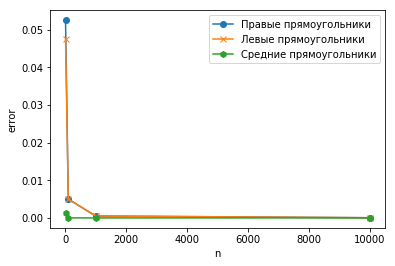

In [12]:
plt.plot([10, 100, 1000, 10000], right_, linestyle='-', marker='o', label = 'Правые прямоугольники')
plt.plot([10, 100, 1000, 10000], left_, linestyle='-', marker='x', label = 'Левые прямоугольники') 
plt.plot([10, 100, 1000, 10000], crect1_, linestyle='-', marker='h', label = 'Средние прямоугольники')
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.show()


#### Метод средних прямоугольников сходится быстрее методов правых и левых прямоугольников, у которых скорость сходимости одинакова.

# Написать программу интегрирования заданной функции методом Симпсона. Сравнить скорость сходимости метода с методом средних прямоугольников.

In [13]:
def simps(f,a,b,N):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [16]:
simps_ = []
for n in (10, 100, 1000, 10000):
    simps_.append(abs(simps(lambda x: x**3, 0, 1, n) - 0.25))

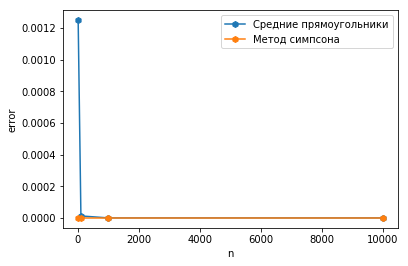

In [21]:
plt.plot([10, 100, 1000, 10000], crect1_, linestyle='-', marker='h', label = 'Средние прямоугольники')
plt.plot([10, 100, 1000, 10000], simps_, linestyle='-', marker='h', label = 'Метод симпсона')
plt.legend()
plt.xlabel('n')
plt.ylabel('error')
plt.show()


#### Скорость сходимости метода симпсона выше, чем метода средних прямоугольников.

# Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой. Указание: для выбора "наибольшего" интервала используйте модуль heapq из стандартной библиотеки. (При использовании языка C++, используйте std::set).

In [22]:
from heapq import *

In [23]:
# Midpoint method
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

In [24]:
# Function for intergate
def f(x):
    return np.exp(-x)
a, b = 0, 20

In [25]:
for i in range(1,20):
    n = 2**(i-1)
    m = midpoint(f, a, b, n)
    print ('Steps of grid:', n , 'Square of integral by midpoint method:', m)

Steps of grid: 1 Square of integral by midpoint method: 0.0009079985952496971
Steps of grid: 2 Square of integral by midpoint method: 0.0673825290140597
Steps of grid: 4 Square of integral by midpoint method: 0.4132091737860514
Steps of grid: 8 Square of integral by midpoint method: 0.7803140700395551
Steps of grid: 16 Square of integral by midpoint method: 0.937745315350861
Steps of grid: 32 Square of integral by midpoint method: 0.9839075024308651
Steps of grid: 64 Square of integral by midpoint method: 0.995942547561725
Steps of grid: 128 Square of integral by midpoint method: 0.9989834692328925
Steps of grid: 256 Square of integral by midpoint method: 0.9997457300536715
Steps of grid: 512 Square of integral by midpoint method: 0.9999364224806402
Steps of grid: 1024 Square of integral by midpoint method: 0.9999841035437852
Steps of grid: 2048 Square of integral by midpoint method: 0.9999960243069246
Steps of grid: 4096 Square of integral by midpoint method: 0.9999990045287919
Steps 

Метод средних прямоугольнико с адаптивной сетокй

In [26]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))
def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    square = -f(xm) * rect[1]
    return (square, rect)    

def get_max_elem(h):    
    big_elem = heappop(h)    
    return big_elem, h   

def adapt_rect(f, a, b, n):
    h = []
    item = make_rect(a, b, f)
    heappush(h, item)
    for _ in range(n):
        rect, lst = get_max_elem(h)
        w, (start, width) = rect
        # and split it into two halves
        c = start + width / 2.        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        heappush(h, rect1)
        heappush(h, rect2)        
    return -sum(w for w, r in h)

In [27]:
for i in range(1,20):
    n = 2**(i-1) 
    res = adapt_rect(f, a, b, n)
    print ('Steps of grid:', n, 'Square of integral by adapt grid method:', res)

Steps of grid: 1 Square of integral by adapt grid method: 0.0673825290140597
Steps of grid: 2 Square of integral by adapt grid method: 0.4131934739934382
Steps of grid: 4 Square of integral by adapt grid method: 0.9223333397188652
Steps of grid: 8 Square of integral by adapt grid method: 0.9646729216747371
Steps of grid: 16 Square of integral by adapt grid method: 0.9773506482466587
Steps of grid: 32 Square of integral by adapt grid method: 0.9935088358210467
Steps of grid: 64 Square of integral by adapt grid method: 0.9943720113277266
Steps of grid: 128 Square of integral by adapt grid method: 0.9956530781155606
Steps of grid: 256 Square of integral by adapt grid method: 0.9959506359510505
Steps of grid: 512 Square of integral by adapt grid method: 0.9960035579301553
Steps of grid: 1024 Square of integral by adapt grid method: 0.9997395353755041
Steps of grid: 2048 Square of integral by adapt grid method: 0.9998300524712693
Steps of grid: 4096 Square of integral by adapt grid method: 

Сравнить скорость сходимости данных методов.

Оценка скорости сходимости производится при помощи вычисления апосториорной ошибки метода (та, которая не известна сразу, а на ходится на каждом шаге вычисления).

Для оценки погрешности используются значения полученные на двух разных сетках (первая формула Ричардсона).

![kkk](https://cdn1.savepice.ru/uploads/2019/11/28/d1156d138c9d22f7a483bc7510c54fa8-full.jpg)

По формуле выше можно оценить эффективный порядок точности метода или скорость сходимости. Немонотонность 𝑟 говорит о том, что начальное разбиение сетки выбрано слишком грубо или наоборот, о том что сетка слишком подробна.

In [36]:
# deriviat function f
def F(x):
    return (-np.exp(-x))
a, b = 0, 20
# exact integral
analitic = F(b) - F(a)

In [37]:
# find errors of methods
for i in range(1,20):
    n = 2**(i-1)
    print('Steps of grid:', n , 'Error of calc by adapt grid:', np.abs(adapt_rect(f, a, b, n) - analitic),'Error of calc by midpoint:', np.abs(midpoint(f, a, b, n) - analitic))

Steps of grid: 1 Error of calc by adapt grid: 0.9326174689247867 Error of calc by midpoint: 0.9990919993435967
Steps of grid: 2 Error of calc by adapt grid: 0.5868065239454082 Error of calc by midpoint: 0.9326174689247867
Steps of grid: 4 Error of calc by adapt grid: 0.0776666582199812 Error of calc by midpoint: 0.586790824152795
Steps of grid: 8 Error of calc by adapt grid: 0.03532707626410936 Error of calc by midpoint: 0.2196859278992913
Steps of grid: 16 Error of calc by adapt grid: 0.02264934969218768 Error of calc by midpoint: 0.06225468258798539
Steps of grid: 32 Error of calc by adapt grid: 0.006491162117799765 Error of calc by midpoint: 0.016092495507981308
Steps of grid: 64 Error of calc by adapt grid: 0.005627986611119851 Error of calc by midpoint: 0.004057450377121463
Steps of grid: 128 Error of calc by adapt grid: 0.004346919823285833 Error of calc by midpoint: 0.001016528705953923
Steps of grid: 256 Error of calc by adapt grid: 0.00404936198779593 Error of calc by midpoint

In [38]:
E = []
q = []
for i in range(1,20):
    n = 2**(i-1)
    c = abs(analitic - midpoint(f, a, b, n))
    E.append(c)
    q.append(n)
r = []
for t in range(0,19):
    r_im1 = np.log(E[t]/E[t-1])/np.log(float(q[t])/q[t-1])
    r.append(r_im1)
    r[t] = float('%.2f' % r_im1)
    print('Steps of grid:', q[t],'Convergence speed of midpoint method:', r[t])

Steps of grid: 1 Convergence speed of midpoint method: -1.77
Steps of grid: 2 Convergence speed of midpoint method: -0.1
Steps of grid: 4 Convergence speed of midpoint method: -0.67
Steps of grid: 8 Convergence speed of midpoint method: -1.42
Steps of grid: 16 Convergence speed of midpoint method: -1.82
Steps of grid: 32 Convergence speed of midpoint method: -1.95
Steps of grid: 64 Convergence speed of midpoint method: -1.99
Steps of grid: 128 Convergence speed of midpoint method: -2.0
Steps of grid: 256 Convergence speed of midpoint method: -2.0
Steps of grid: 512 Convergence speed of midpoint method: -2.0
Steps of grid: 1024 Convergence speed of midpoint method: -2.0
Steps of grid: 2048 Convergence speed of midpoint method: -2.0
Steps of grid: 4096 Convergence speed of midpoint method: -2.0
Steps of grid: 8192 Convergence speed of midpoint method: -2.0
Steps of grid: 16384 Convergence speed of midpoint method: -2.0
Steps of grid: 32768 Convergence speed of midpoint method: -2.0
Steps

In [39]:
E = []
q = []
for i in range(1,20):
    n = 2**(i-1)
    c = abs(analitic - adapt_rect(f, a, b, n))
    E.append(c)
    q.append(n)
ra = []
for t in range(0,19):
    r_im1a = np.log(E[t]/E[t-1])/np.log(float(q[t])/q[t-1])
    ra.append(r_im1a)
    ra[t] = float('%.2f' % r_im1a)
    print('Steps of grid:', q[t],'Convergence speed of adapt grid method:', ra[t])

Steps of grid: 1 Convergence speed of adapt grid method: -0.8
Steps of grid: 2 Convergence speed of adapt grid method: -0.67
Steps of grid: 4 Convergence speed of adapt grid method: -2.92
Steps of grid: 8 Convergence speed of adapt grid method: -1.14
Steps of grid: 16 Convergence speed of adapt grid method: -0.64
Steps of grid: 32 Convergence speed of adapt grid method: -1.8
Steps of grid: 64 Convergence speed of adapt grid method: -0.21
Steps of grid: 128 Convergence speed of adapt grid method: -0.37
Steps of grid: 256 Convergence speed of adapt grid method: -0.1
Steps of grid: 512 Convergence speed of adapt grid method: -0.02
Steps of grid: 1024 Convergence speed of adapt grid method: -3.94
Steps of grid: 2048 Convergence speed of adapt grid method: -0.62
Steps of grid: 4096 Convergence speed of adapt grid method: -1.5
Steps of grid: 8192 Convergence speed of adapt grid method: -0.16
Steps of grid: 16384 Convergence speed of adapt grid method: -0.25
Steps of grid: 32768 Convergence s

Оценка сходимости метода удобна для проверки корректности работы алгоритма. Для этого удобно строить графики.

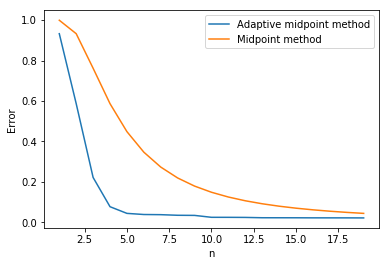

In [41]:
res1 = []
res2 = []

a, b = 0, 20
step = []
for n in range(1,20):
    
    step.append(n)
    res1.append(abs(adapt_rect(f, a, b, n)-analitic))
    res2.append(abs(midpoint(f,a,b,n)-analitic))
    
    
plt.figure()


plt.plot(step, res1, label='Adaptive midpoint method')
plt.plot(step, res2, label='Midpoint method')


plt.legend()
plt.ylabel('Error')
plt.xlabel('n')

plt.show()


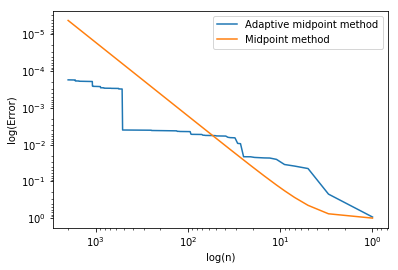

In [42]:
ada = []
mid = []

a, b = 0, 20
step = []
for n in range(1,2000,2):
    step.append(n)
    ada.append(abs(adapt_rect(f, a, b, n)-analitic))
    mid.append(abs(midpoint(f,a,b,n)-analitic))
    
    
plt.figure()

plt.loglog(step, ada, label='Adaptive midpoint method')
plt.loglog(step, mid, label='Midpoint method')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.legend()
plt.ylabel('log(Error)')
plt.xlabel('log(n)')

plt.show()


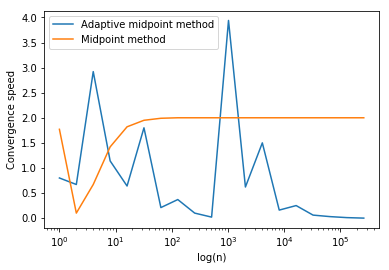

In [43]:
ada = [x * -1 for x in ra]
mid = [x * -1 for x in r]

plt.figure()

plt.plot(q, ada, label='Adaptive midpoint method')
plt.plot(q, mid, label='Midpoint method')



plt.legend()
plt.xscale('log')
plt.ylabel('Convergence speed')
plt.xlabel('log(n)')

plt.show()
